In [14]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import utils, transforms
from glob import glob
import os

In [15]:
class NiftiDataset(Dataset):
    """
    create a dataset class in PyTorch for reading NIfTI files
    Args:
        source_dir (str): path to images
        transform (Callable): transform to apply to images (Probably None or ToTensor)
        preload (bool): load all data when initializing the dataset
    """

    def __init__(self, source_dir, transform=None, preload=False):
        self.source_fns = sorted(glob(os.path.join(source_dir, "*.nii.gz")))
        self.transform = transform
        self.preload = preload
        if preload:
            self.imgs = [nib.load(s).get_data() for s in self.source_fns]

    def __len__(self):
        return len(self.source_fns)

    def __getitem__(self, idx:int):
        if not self.preload:
            src_fn = self.source_fns[idx]
            img_tmp = nib.load(src_fn)
            sample = [img_tmp.get_fdata(dtype=np.float64), img_tmp.header['pixdim']]
        else:
            sample = self.imgs[idx]
        if self.transform is not None:
            sample = [self.transform(sample[0]), sample[1]]
        return sample


In [16]:
good_data = NiftiDataset(source_dir='/media/data/Track_2/good',
                         transform=transforms.Compose([
                             transforms.ToTensor(),
#                              transforms.Normalize(mean=[0.5]*218, std=[0.1]*218)
                         ])
                        )
bad_data = NiftiDataset(source_dir='/media/data/Track_2/bad',
                       transform=transforms.ToTensor())

pure_data = NiftiDataset(source_dir='/media/data/Track_2/mni',
                        transform=transforms.ToTensor())

batch_size = 1
good_dataloader = DataLoader(good_data, batch_size=batch_size,
                             shuffle=True, num_workers=batch_size)
bad_dataloader = DataLoader(bad_data, batch_size=batch_size,
                            shuffle=True, num_workers=batch_size)
pure_dataloader = DataLoader(pure_data, batch_size=batch_size, shuffle=True, num_workers=batch_size)

torch.Size([1, 182, 182, 218])
torch.Size([1, 182, 182, 218])
torch.Size([91, 91, 109])
Good Brain


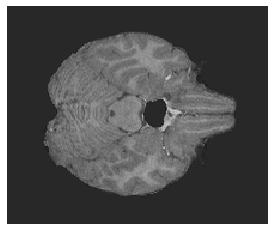

Bad Brain


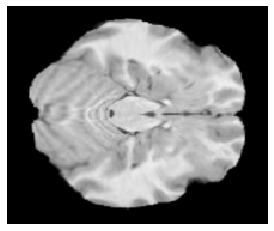

torch.Size([1, 182, 182, 218])
torch.Size([1, 182, 182, 218])
torch.Size([91, 109])
Good Brain


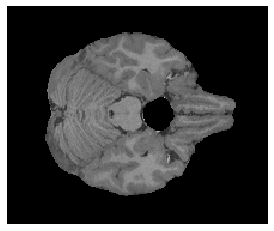

Bad Brain


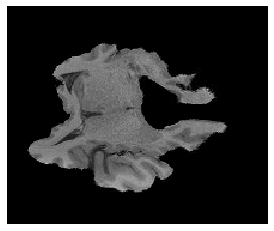

In [20]:
def show_brains(images_batch):
    mean_val = images_batch.mean(dim=[1,2,3])
    std_val = images_batch.std(dim=[1,2,3])
    images_batch = (images_batch-mean_val[:, None, None, None])/std_val[:, None, None, None]

    images_batch = (images_batch-images_batch.min())/(images_batch.max()-images_batch.min())
    images_batch = images_batch[:, 50, :, :]
    images_batch = images_batch.unsqueeze(1)
    grid = utils.make_grid(images_batch)
    
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

for good_batch, bad_batch, pure_dataloader in zip(good_dataloader, bad_dataloader, pure_dataloader):
    print(good_batch[0].size())
    good_batch = good_batch[0]
    bad_batch = bad_batch[0]
    pure_batch = pure_batch[0]
    print(good_batch.size())
    print(pure_batch.size())
    plt.figure()
    print("Good Brain")
    show_brains(good_batch)
    plt.axis('off')
    plt.ioff()
    plt.show()
    plt.figure()
    print("Bad Brain")
    show_brains(bad_batch)
    plt.axis('off')
    plt.ioff()
    plt.show()

In [5]:

    mean_val = images_batch.mean(dim=[1,2,3])
    std_val = images_batch.std(dim=[1,2,3])
    images_batch = (images_batch-mean_val[:, None, None, None])/std_val[:, None, None, None]

NameError: name 'images_batch' is not defined